In [18]:
import json
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
DATA_FILES = ['ITiCSE18.json', 'ITiCSE19.json', 'ITiCSE20.json']

In [4]:
# Load data
author_affiliations = {}
all_papers = []
for filename in DATA_FILES:
    with open(filename) as f:
        papers = json.load(f)
    for paper in papers:
        authors = []
        affiliations = []
        for author in paper['authors']:
            # TODO check if any author changed affiliations. Yep, that happens...
            name = author['name']
            affiliation = author['affiliation']
            author_affiliations[name] = affiliation
            authors.append(name)
            affiliations.append(affiliation)
        paper['authors'] = authors
        paper['affiliations'] = affiliations
        paper['venue'] = os.path.splitext(os.path.basename(filename))[0]
        all_papers.append(paper)
papers = pd.DataFrame(all_papers)
papers.head()

,title,link,abstract,authors,tags,affiliations,venue
0,Dancing rainbots: computing education with gir...,https://dl.acm.org/doi/10.1145/3197091.3211885,"We want women and girls to participate, thrive...",[Judy Robertson],"[barriers, inclusion, Women in computing]","[University of Edinburgh, UK]",ITiCSE18
1,A new era towards more engaging and human-like...,https://dl.acm.org/doi/10.1145/3197091.3211886,Engagement of learners in computer-based tutor...,[Maria Virvou],"[personalisation, artificial intelligence, Com...","[University of Piraeus, Greece]",ITiCSE18
2,Improving complex task performance using a seq...,https://dl.acm.org/doi/10.1145/3197091.3197141,Online coding tools are an increasingly common...,"[Andrew Luxton-Reilly, Michelle Craig, Paul De...","[assessment, compound assessment, novice progr...","[University of Auckland, New Zealand, Universi...",ITiCSE18
3,Syntax error based quantification of the learn...,https://dl.acm.org/doi/10.1145/3197091.3197121,Recent data-driven research has produced metri...,"[Luke Mathieson, Alireza Ahadi, Raymond Lister]","[programming, student mistakes, syntactic erro...","[University of Technology Sydney, Australia, U...",ITiCSE18
4,Programming: predicting student success early ...,https://dl.acm.org/doi/10.1145/3197091.3197101,"This paper describes a large, multi-institutio...","[Keith Quille, Susan Bergin]","[CS1, Programming, Predictors, Success, Comput...","[Institute of Technology Tallaght, Ireland / M...",ITiCSE18


In [6]:
# Define functions
def find_keywords(keywords):
    def find(row):
        search_str = row.title.lower() + row.abstract.lower() + ''.join(t.lower() for t in row.tags)
        for word in keywords:
            if word in search_str:
                return 1
        return 0
    return find

def papers_with_keywords_percent(papers, keywords):
    found = papers.apply(find_keywords(keywords), axis=1).sum()
    return 100 * found / len(papers)

# Papers related to automated feedback

In [7]:
search_keywords = [
    ['automatic', 'automated'],
    ['project'],
]
for keywords in search_keywords:
    print(f'{papers_with_keywords_percent(papers, keywords):.2f}% of the papers include the keywords: {", ".join(keywords)}')

9.01% of the papers include the keywords: automatic, automated
17.12% of the papers include the keywords: project


# Tag Cloud

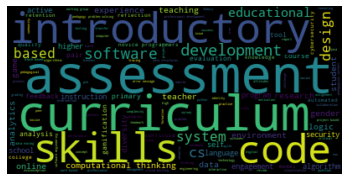

In [15]:
ignore = ['programming', 'education', 'learning', 'computer', 'science', 'computing', 'student', 'cs1']
all_tags = ' '.join(t.lower() for t in papers.tags.sum())
all_tags = ' '.join(w for w in all_tags.split() if w not in ignore)
wordcloud = WordCloud().generate(all_tags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
pass

# Authors

In [28]:
c = Counter(papers.authors.sum())
for count, name in sorted(((count, name) for name, count in c.items()), reverse=True):
    if count > 2:
        print(f'{name} ({count} publications)')

Brett A. Becker (11 publications)
Judy Sheard (8 publications)
Arto Hellas (8 publications)
Monica M. McGill (7 publications)
Mark Zarb (7 publications)
Andrew Petersen (7 publications)
 Simon (7 publications)
Juho Leinonen (6 publications)
Cruz Izu (6 publications)
Soohyun Nam Liao (5 publications)
Robert McCartney (5 publications)
Richard Glassey (5 publications)
Rebecca Vivian (5 publications)
Paul Denny (5 publications)
Mirela Gutica (5 publications)
Majd Sakr (5 publications)
Leo Porter (5 publications)
Keith Quille (5 publications)
Kate Sanders (5 publications)
Francesco Maiorana (5 publications)
Brian Harrington (5 publications)
Andrew Luxton-Reilly (5 publications)
Tiffany Young (4 publications)
Tiffany Barnes (4 publications)
Rajendra K. Raj (4 publications)
Quintin Cutts (4 publications)
Nicholas Lytle (4 publications)
Neena Thota (4 publications)
Linda Ott (4 publications)
Katrina Falkner (4 publications)
Janet Hughes (4 publications)
Jack Parkinson (4 publications)
Ian Poll